In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, ellip, iirfilter, freqz, sosfiltfilt, sosfreqz
from scipy.signal import filtfilt

Definimos nuestra señal de entrada y los parametros de nuestro filtro:

In [ ]:
array_reposo = np.genfromtxt("/content/REPOSO1_ANDY.txt",delimiter="	",skip_header = 2)
array_respiracion=np.genfromtxt("/content/RESPIRACION_DEV1.txt",delimiter="	",skip_header = 2)
array_ejercicio=np.genfromtxt("/content/EJERCICIO_DEV1.txt",delimiter="	",skip_header = 2)

#Guardamos los valores de cada caso a un tipo de array
valores_reposo=array_reposo[:,-2]
valores_respiracion=array_respiracion[:,-2]
valores_ejercicio=array_ejercicio[:,-2]

#Determinamos la longitud de cada arreglo
cantidad_reposo=np.size(valores_reposo);
cantidad_respiracion=np.size(valores_respiracion);
cantidad_ejercicio=np.size(valores_ejercicio);

#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
Fs=1000 #Hz
#Creamos los vectores de tiempo para cada caso
tiempo_reposo=np.arange(0,cantidad_reposo)
tiempo_reposo=tiempo_reposo/1000

tiempo_respiracion=np.arange(0,cantidad_respiracion)
tiempo_respiracion=tiempo_respiracion/1000

tiempo_ejercicio=np.arange(0,cantidad_ejercicio)
tiempo_ejercicio=tiempo_ejercicio/1000

#Convertimos los valores ADC a voltaje (mV)
valores_reposo=(((valores_reposo/1024)-0.5)*3.3)/(1100)
valores_reposo=valores_reposo*1000

valores_respiracion=(((valores_respiracion/1024)-0.5)*3.3)/(1100)
valores_respiracion=valores_respiracion*1000

valores_ejercicio=(((valores_ejercicio/1024)-0.5)*3.3)/(1100)
valores_ejercicio=valores_ejercicio*1000


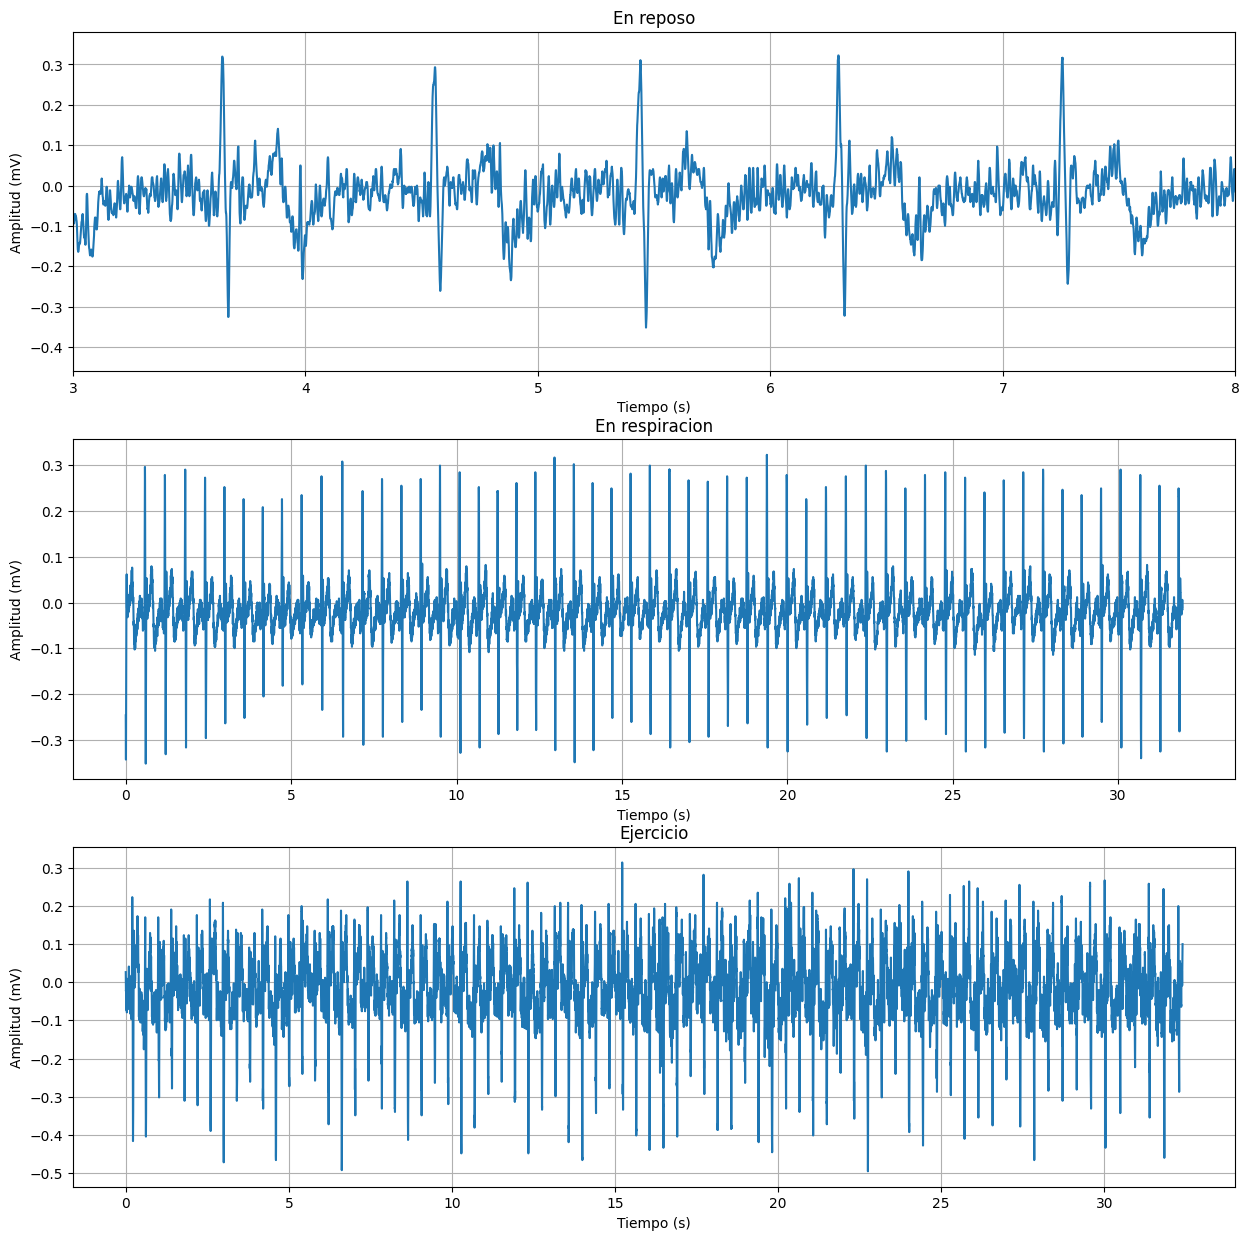

In [ ]:
#Primero, mostramos todas las senales en crudo, es decir, sin filtrar
plt.figure(1,[15,15]);
plt.subplot(3,1,1);plt.plot(tiempo_reposo,valores_reposo);plt.xlabel('Tiempo (s)');plt.ylabel('Amplitud (mV)');plt.title('En reposo');plt.xlim([3,8]);plt.grid(True);
plt.subplot(3,1,2);plt.plot(tiempo_respiracion,valores_respiracion);plt.xlabel('Tiempo (s)');plt.ylabel('Amplitud (mV)');plt.title('En respiracion');plt.grid(True)
plt.subplot(3,1,3);plt.plot(tiempo_ejercicio,valores_ejercicio);plt.xlabel('Tiempo (s)');plt.ylabel('Amplitud (mV)');plt.title('Ejercicio');plt.grid(True);


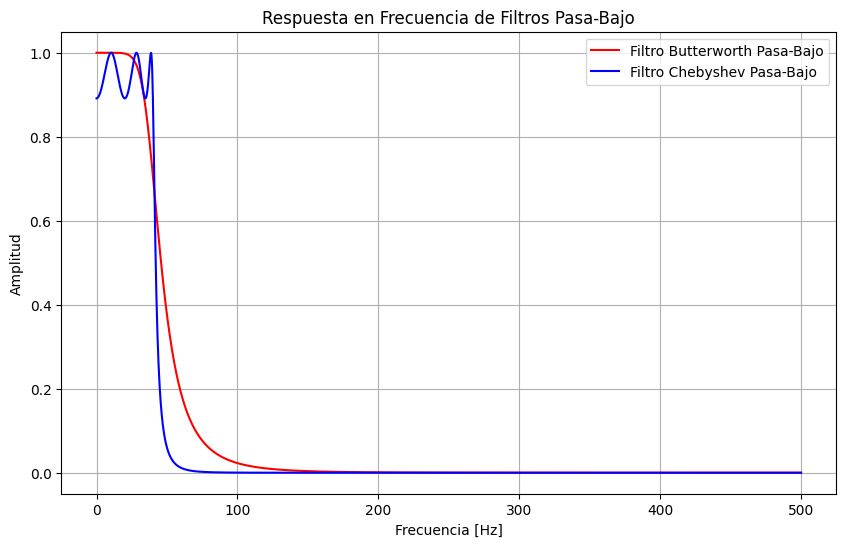

In [ ]:
fs = 1000           # Frecuencia de muestreo
nyq = fs / 2        # Frecuencia de Nyquist
order_iir = 4       # Orden de los filtros IIR

# Butterworth low pass 40Hz
b_low, a_low = butter(order_iir, 40/nyq, btype='lowpass', output='ba')

# Chebyshev I Band-pass low pass 40Hz
b_low_cheby, a_low_cheby = cheby1(order_iir+2, 1, 40/nyq, btype='lowpass', output='ba')

# Respuesta en frecuencia del filtro Butterworth
w_butter, h_butter = freqz(b_low, a_low, worN=2000)
plt.figure(figsize=(10, 6))
plt.plot(w_butter / np.pi * nyq, abs(h_butter), label='Filtro Butterworth Pasa-Bajo', color='r')

# Respuesta en frecuencia del filtro Chebyshev
w_cheby, h_cheby = freqz(b_low_cheby, a_low_cheby, worN=2000)
plt.plot(w_cheby / np.pi * nyq, abs(h_cheby), label='Filtro Chebyshev Pasa-Bajo', color='b')

# Establecer etiquetas y título
plt.title('Respuesta en Frecuencia de Filtros Pasa-Bajo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)

# Leyenda
plt.legend(loc='best')
plt.show()


In [ ]:
# Filtrar las señales usando los filtros definidos
valores_reposo_filtrado = filtfilt(b_low, a_low, valores_reposo)
valores_respiracion_filtrado = filtfilt(b_low, a_low, valores_respiracion)
valores_ejercicio_filtrado = filtfilt(b_low, a_low, valores_ejercicio)

# O usando el filtro Chebyshev
valores_reposo_filtrado_cheby = filtfilt(b_low_cheby, a_low_cheby, valores_reposo)
valores_respiracion_filtrado_cheby = filtfilt(b_low_cheby, a_low_cheby, valores_respiracion)
valores_ejercicio_filtrado_cheby = filtfilt(b_low_cheby, a_low_cheby, valores_ejercicio)

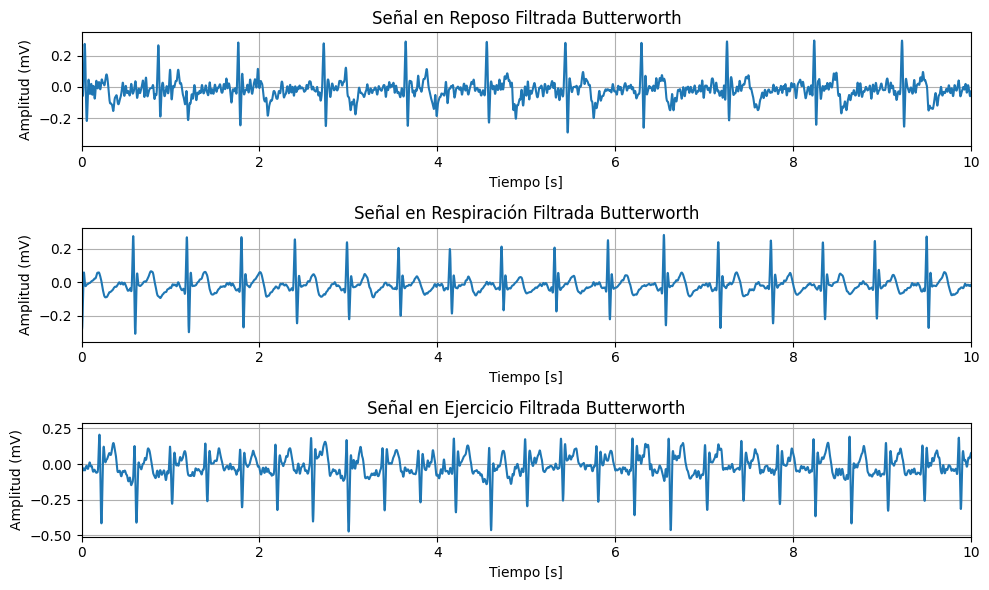

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar señales filtradas (Butterworth)
plt.subplot(3, 1, 1)
plt.plot(tiempo_reposo, valores_reposo_filtrado, label="Reposo Filtrado Butterworth")
plt.title("Señal en Reposo Filtrada Butterworth")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud (mV)")
plt.xlim(0, 10)  # Limitar el eje x de 0 a 10 segundos
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo_respiracion, valores_respiracion_filtrado, label="Respiración Filtrada Butterworth")
plt.title("Señal en Respiración Filtrada Butterworth")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud (mV)")
plt.xlim(0, 10)  # Limitar el eje x de 0 a 10 segundos
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo_ejercicio, valores_ejercicio_filtrado, label="Ejercicio Filtrado Butterworth")
plt.title("Señal en Ejercicio Filtrada Butterworth")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud (mV)")
plt.xlim(0, 10)  # Limitar el eje x de 0 a 10 segundos
plt.grid(True)

plt.tight_layout()
plt.show()



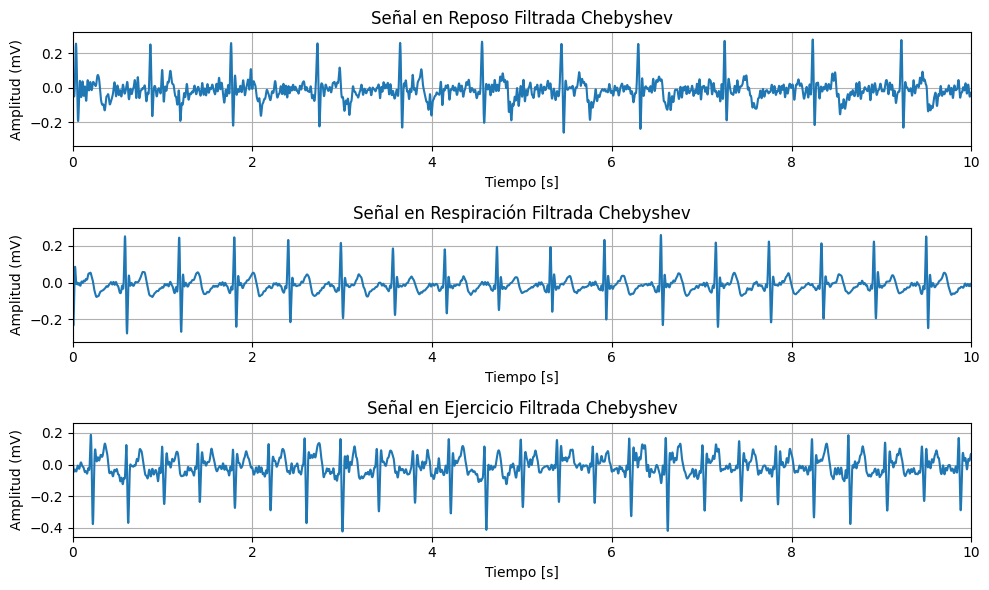

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar señales filtradas (Butterworth)
plt.subplot(3, 1, 1)
plt.plot(tiempo_reposo, valores_reposo_filtrado_cheby, label="Reposo Filtrado Chebyshev ")
plt.title("Señal en Reposo Filtrada Chebyshev")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud (mV)")
plt.xlim(0, 10)  # Limitar el eje x de 0 a 10 segundos
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo_respiracion, valores_respiracion_filtrado_cheby, label="Respiración Filtrada Chebyshev ")
plt.title("Señal en Respiración Filtrada Chebyshev")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud (mV)")
plt.xlim(0, 10)  # Limitar el eje x de 0 a 10 segundos
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo_ejercicio, valores_ejercicio_filtrado_cheby, label="Ejercicio Filtrado Chebyshev ")
plt.title("Señal en Ejercicio Filtrada Chebyshev")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud (mV)")
plt.xlim(0, 10)  # Limitar el eje x de 0 a 10 segundos
plt.grid(True)

plt.tight_layout()
plt.show()